# Random Forest Model interpretation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [3]:
set_plot_sizes(12,14,16)

In [4]:
!tree data/bulldozers/

data/bulldozers/
├── Data%20Dictionary.xlsx
├── Machine_Appendix.csv
├── Test.csv
├── Train.7z
├── Train.csv
├── Train.zip
├── TrainAndValid.7z
├── TrainAndValid.csv
├── TrainAndValid.zip
├── Valid.7z
├── Valid.csv
├── Valid.zip
├── ValidSolution.csv
├── median_benchmark.csv
└── random_forest_benchmark_test.csv

0 directories, 15 files


In [5]:
!ls tmp/bulldozers-raw

tmp/bulldozers-raw


In [6]:
#Load data 

PATH = "data/bulldozers/"

df_raw = pd.read_feather('tmp/bulldozers-raw')
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [7]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [8]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [9]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


In [10]:
set_rf_samples(50000)

In [11]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2062356268409863, 0.24919707033167426, 0.911108096084933, 0.8890994146275494, 0.8940535486149306]


In [12]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.65 s, sys: 88.2 ms, total: 1.74 s
Wall time: 1.78 s


(9.321079066641895, 0.2742217041692983)

In [13]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 79.3 ms, sys: 94.9 ms, total: 174 ms
Wall time: 1.15 s


(9.321079066641895, 0.2742217041692983)

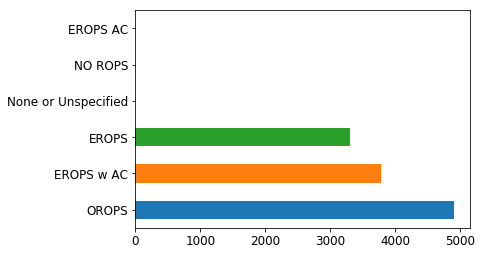

In [14]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Enclosure.value_counts().plot.barh();

In [15]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.842860,0.279436
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.577310,0.267221
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.686058,0.222193


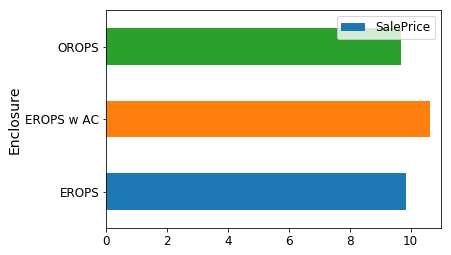

In [16]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

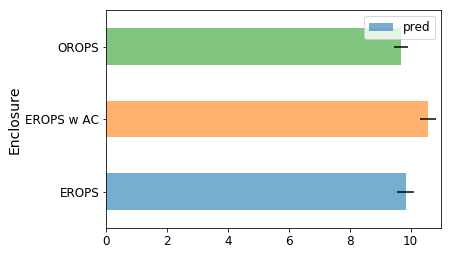

In [17]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

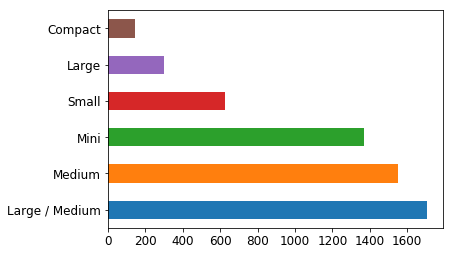

In [18]:
raw_valid.ProductSize.value_counts().plot.barh();

In [19]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.870133,0.351814
Large,10.470589,10.380834,0.349011
Large / Medium,10.691871,10.648940,0.298309
Medium,10.681511,10.624600,0.286493
Mini,9.535147,9.569341,0.257927
Small,10.324448,10.325040,0.310087


In [20]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Compact           0.035644
Large             0.033621
Small             0.030033
Large / Medium    0.028013
Medium            0.026965
Mini              0.026953
dtype: float64

In [21]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.170631
13,ProductSize,0.093493
37,Coupler_System,0.087150
14,fiProductClassDesc,0.071326
39,Hydraulics_Flow,0.067828
2,ModelID,0.056708
63,saleElapsed,0.050331
10,fiSecondaryDesc,0.043863
19,Enclosure,0.043632
8,fiModelDesc,0.032546


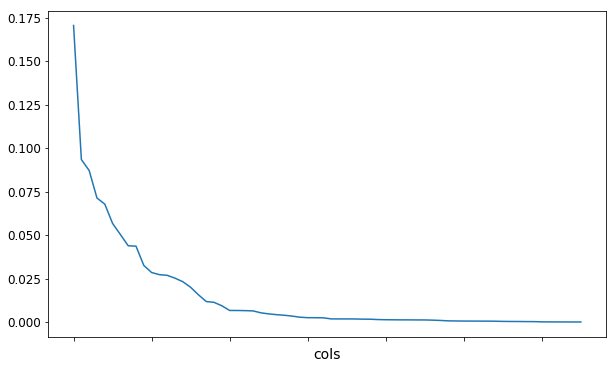

In [22]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [23]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

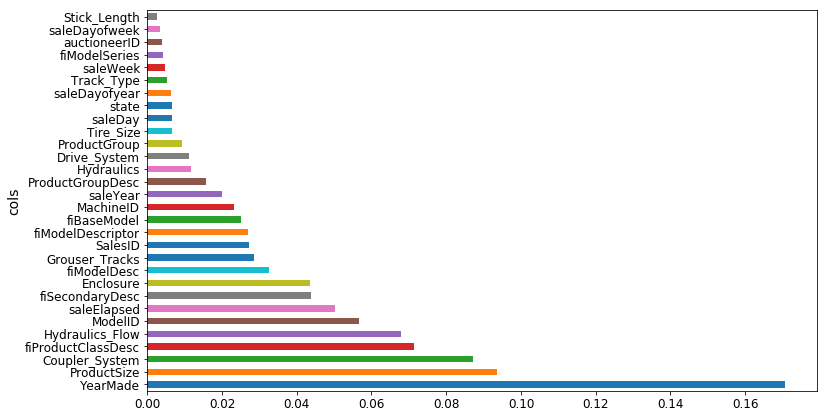

In [24]:
plot_fi(fi[:30]);

In [25]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

25

In [26]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [27]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20716818335573928, 0.24642158410009127, 0.9103023754959866, 0.8915560160304647, 0.8939553617080296]


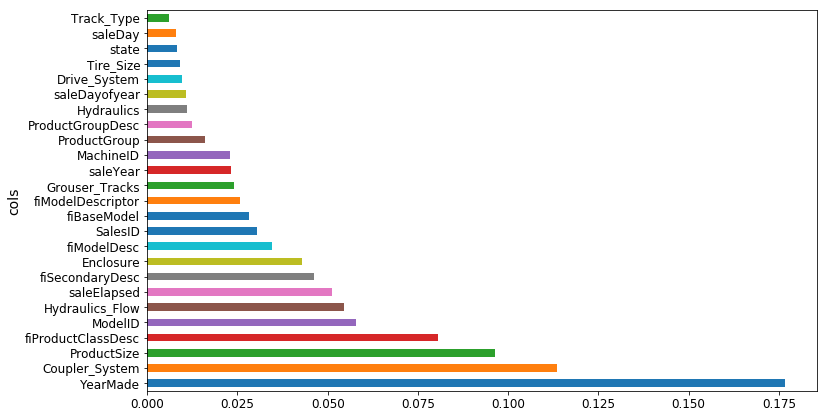

In [28]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [29]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2076706730724648, 0.2537735062456609, 0.9098667217697715, 0.8849886942207631, 0.8921119238995254]


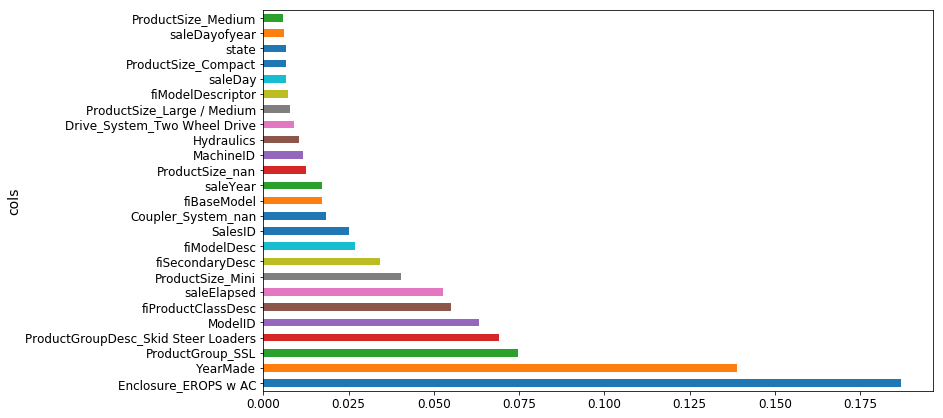

In [30]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:25]);

In [31]:
from scipy.cluster import hierarchy as hc

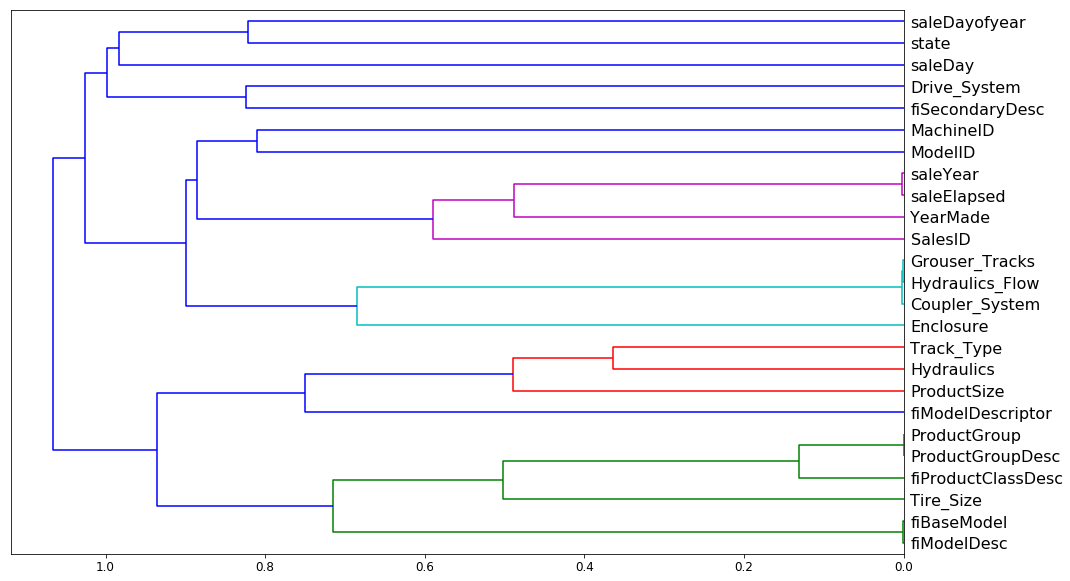

In [32]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [33]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [34]:
get_oob(df_keep)

0.8901798997231586

In [35]:
for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

saleYear 0.8892145514612629
saleElapsed 0.8869571878929983
fiModelDesc 0.8881244963720732
fiBaseModel 0.8895181905475192
Grouser_Tracks 0.8899252192248512
Coupler_System 0.8901735558138074


In [36]:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8891617818112961

In [37]:
df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [38]:
np.save('tmp/keep_cols.npy', np.array(df_keep.columns))

In [39]:
keep_cols = np.load('tmp/keep_cols.npy')
df_keep = df_trn[keep_cols]

In [40]:
reset_rf_samples()

In [41]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12495353361378725, 0.22670236595972978, 0.9673688852449716, 0.9082174585198076, 0.908773896651167]


In [42]:
from pdpbox import pdp
from plotnine import *

In [43]:
set_rf_samples(50000)

In [44]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

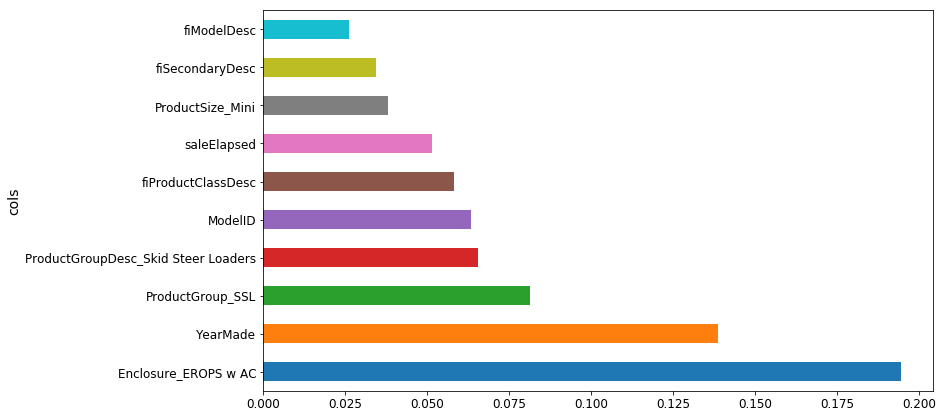

In [45]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

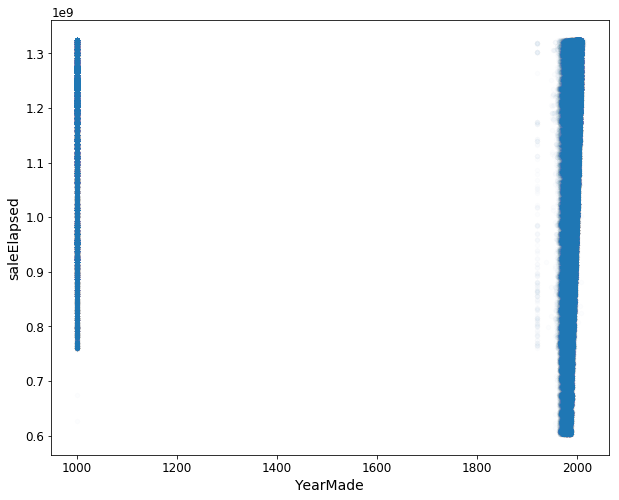

In [46]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [47]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

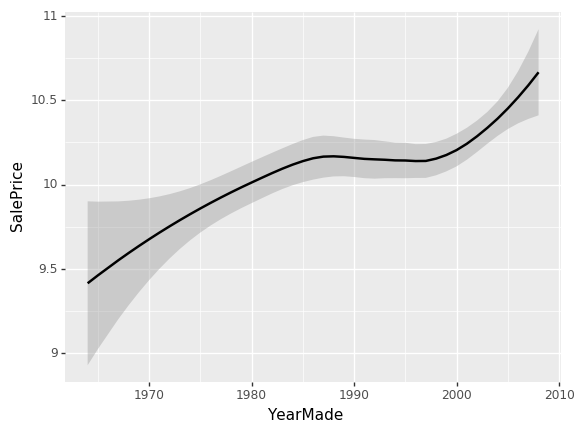

<ggplot: (7549304801)>

In [48]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [49]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [50]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, x, x.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c1f9399b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c21e354a8>})

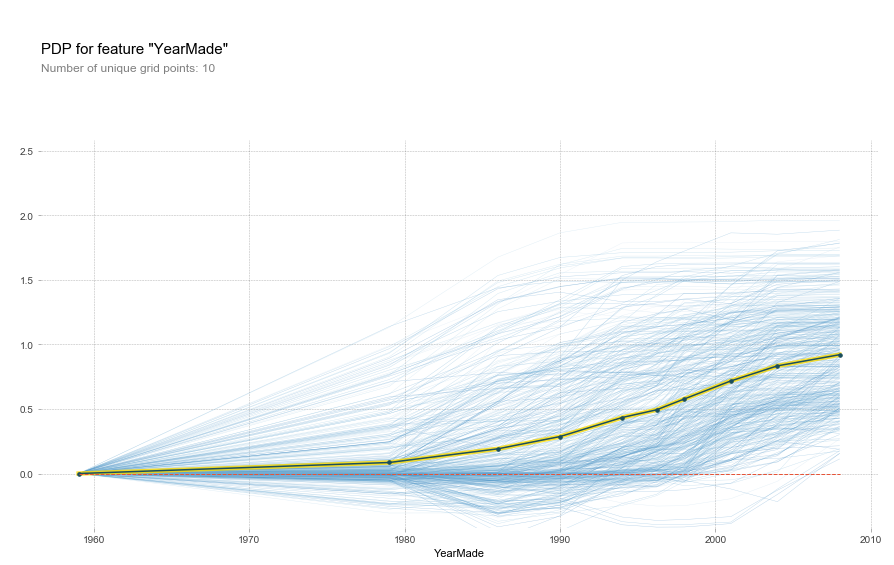

In [51]:
plot_pdp('YearMade')

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c20b782b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c20b7c8d0>})

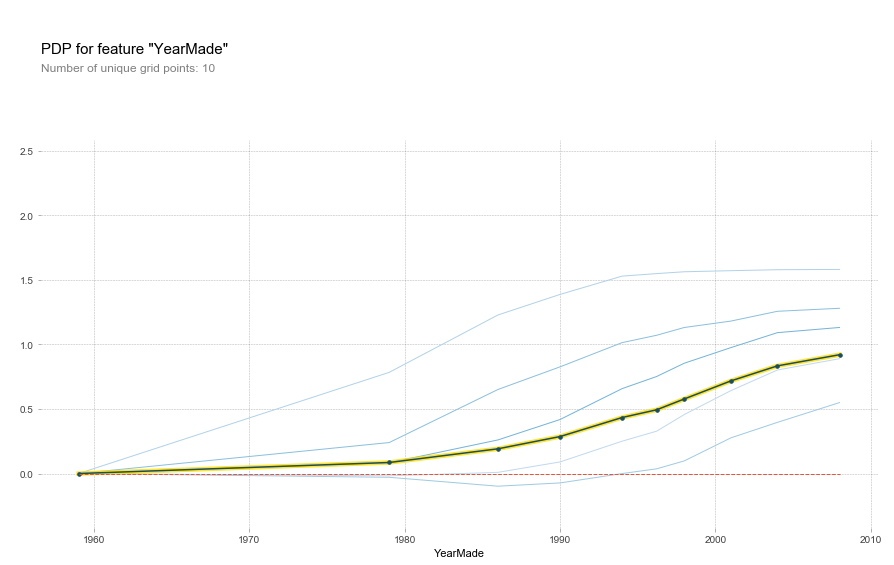

In [52]:
plot_pdp('YearMade', clusters=5)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c2289c470>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c20bb9b00>})

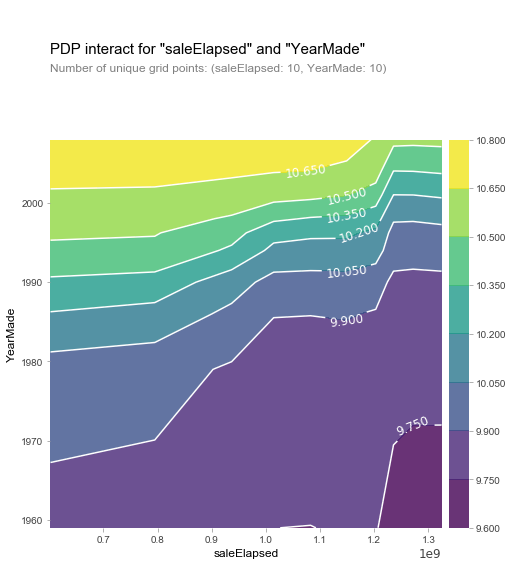

In [55]:
feats = ['saleElapsed', 'YearMade']
p = pdp.pdp_interact(m, x, x.columns, feats)
pdp.pdp_interact_plot(p, feats)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c273a2470>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c251f0ac8>})

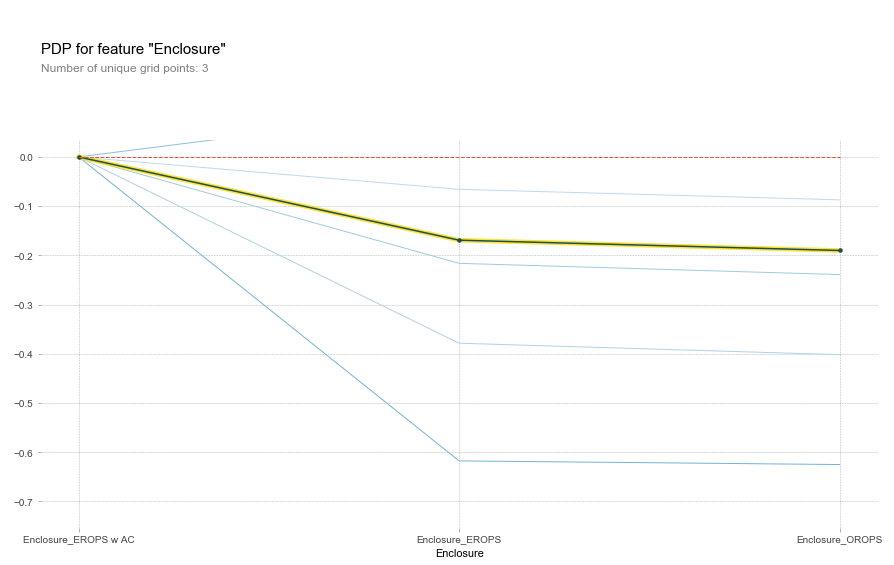

In [56]:
plot_pdp(['Enclosure_EROPS w AC', 'Enclosure_EROPS', 'Enclosure_OROPS'], 5, 'Enclosure')

In [57]:
df_raw.YearMade[df_raw.YearMade<1950] = 1950
df_keep['age'] = df_raw['age'] = df_raw.saleYear-df_raw.YearMade

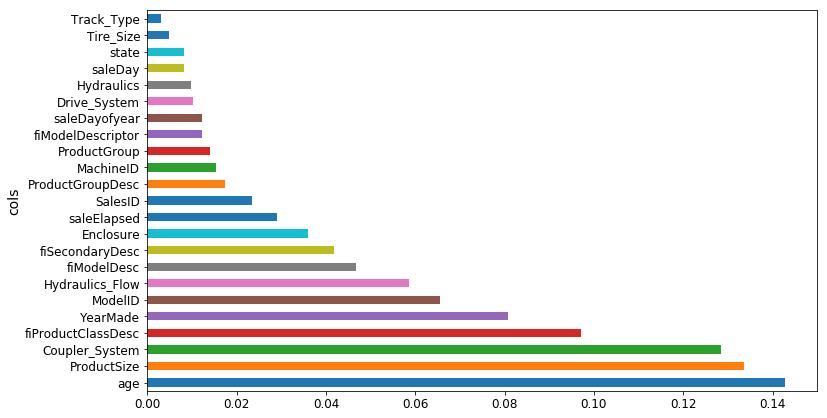

In [58]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train)
plot_fi(rf_feat_importance(m, df_keep));

In [63]:
from treeinterpreter import treeinterpreter as ti

In [64]:
df_train, df_valid = split_vals(df_raw[df_keep.columns], n_trn)

In [65]:
row = X_valid.values[None,0]; row

array([[      1999,          5,          0,         17,          0,        665, 1284595200,          0,
                 1,       3232,    4364751,          0,    2300944,          4,         12,          0,
                 4,          0,         16,         35,        259,          2,         11]])

In [66]:
prediction, bias, contributions = ti.predict(m, row)

In [67]:
prediction[0], bias[0]

(9.286568025170448, 10.105989991195953)

In [68]:
idxs = np.argsort(contributions[0])

In [69]:
[o for o in zip(df_keep.columns[idxs], df_valid.iloc[0][idxs], contributions[0][idxs])]

[('ProductSize', 'Mini', -0.594846827226389),
 ('age', 11, -0.1235400249886696),
 ('fiModelDesc', 'KX1212', -0.10351438826645691),
 ('fiProductClassDesc',
  'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
  -0.09803463402014354),
 ('fiSecondaryDesc', nan, -0.05910131690742868),
 ('Enclosure', 'EROPS', -0.042485143970172376),
 ('saleElapsed', 1284595200, -0.028559433093269516),
 ('fiModelDescriptor', nan, -0.018632159223158196),
 ('Hydraulics', 'Standard', -0.012486405049143246),
 ('SalesID', 4364751, -0.01003059638961452),
 ('saleDay', 16, -0.006369179534337466),
 ('Tire_Size', nan, -0.0034705313127088465),
 ('state', 'Ohio', -0.0030851115203818667),
 ('Drive_System', nan, 0.001522241168085392),
 ('MachineID', 2300944, 0.0034707730049322815),
 ('ProductGroup', 'TEX', 0.008964972917071767),
 ('saleDayofyear', 259, 0.010726036186720123),
 ('ProductGroupDesc', 'Track Excavators', 0.010859331057185529),
 ('Track_Type', 'Steel', 0.017980059599182897),
 ('Hydraulics_Flow', nan, 0.0290

In [70]:
contributions[0].sum()

-0.8194219660255057

In [71]:
df_ext = df_keep.copy()
df_ext['is_valid'] = 1
df_ext.is_valid[:n_trn] = 0
x, y, nas = proc_df(df_ext, 'is_valid')

In [72]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9999950140230601

In [73]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
10,SalesID,0.758081
6,saleElapsed,0.166317
12,MachineID,0.057185
20,saleDayofyear,0.006171
0,YearMade,0.004037
5,ModelID,0.001745
9,fiModelDesc,0.001452
2,Coupler_System,0.001158
8,Enclosure,0.000876
14,Hydraulics,0.000636


In [74]:
feats=['SalesID', 'saleElapsed', 'MachineID']

In [75]:
(X_train[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,389125.000000,3.891250e+05,389125.000000
mean,1800.452485,1.084797e+06,1206.796148
std,595.627288,1.803913e+05,430.850552
min,1139.246000,6.009984e+05,0.000000
25%,1413.348000,9.666432e+05,1087.016000
50%,1632.093000,1.134605e+06,1273.859000
75%,2210.453000,1.234138e+06,1458.661000
max,4364.741000,1.325117e+06,2313.821000


In [76]:
(X_valid[feats]/1000).describe()

,SalesID,saleElapsed,MachineID
count,12000.000000,1.200000e+04,12000.000000
mean,5786.967651,1.306609e+06,1578.049709
std,836.899608,2.497808e+04,589.497173
min,4364.751000,1.174522e+06,0.830000
25%,4408.580750,1.309219e+06,1271.225250
50%,6272.538500,1.316045e+06,1825.317000
75%,6291.792250,1.321402e+06,1907.858000
max,6333.342000,1.325203e+06,2486.330000


In [77]:
x.drop(feats, axis=1, inplace=True)

In [78]:
m = RandomForestClassifier(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(x, y);
m.oob_score_

0.9788769086942973

In [79]:
fi = rf_feat_importance(m, x); fi[:10]

,cols,imp
19,age,0.233335
0,YearMade,0.188699
17,saleDayofyear,0.158061
5,ModelID,0.077013
8,fiModelDesc,0.060846
15,saleDay,0.057379
16,state,0.055197
3,fiProductClassDesc,0.031382
6,fiSecondaryDesc,0.023375
7,Enclosure,0.022163


In [80]:
set_rf_samples(50000)

In [81]:
feats=['SalesID', 'saleElapsed', 'MachineID', 'age', 'YearMade', 'saleDayofyear']

In [82]:
X_train, X_valid = split_vals(df_keep, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2077927756235021, 0.24799634276843632, 0.9097607006503372, 0.890165563422968, 0.8932721799386897]


In [83]:
for f in feats:
    df_subs = df_keep.drop(f, axis=1)
    X_train, X_valid = split_vals(df_subs, n_trn)
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(X_train, y_train)
    print(f)
    print_score(m)

SalesID
[0.2090004623844915, 0.24586219670217946, 0.9087087150481328, 0.8920478020512234, 0.8924496684147598]
saleElapsed
[0.21406830913341193, 0.25622224296981366, 0.9042277736018766, 0.8827584284207133, 0.8869978649897309]
MachineID
[0.20661273793903884, 0.2474515953917337, 0.9107827131977874, 0.8906475568845533, 0.8950666915625762]
age
[0.20847490172596816, 0.2480348724602646, 0.9091672669788653, 0.8901314321475827, 0.8925617204706151]
YearMade
[0.20852831113076656, 0.25155299208051785, 0.9091207199499483, 0.8869925829118552, 0.8924525712029576]
saleDayofyear
[0.20896910427337123, 0.2458838986222064, 0.9087361074037852, 0.8920287436242298, 0.8925523472887372]


In [84]:
reset_rf_samples()

In [85]:
df_subs = df_keep.drop(['SalesID', 'MachineID', 'saleDayofyear'], axis=1)
X_train, X_valid = split_vals(df_subs, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1375143935771369, 0.21863082917237311, 0.9604787072474965, 0.914636782178305, 0.9092556414050161]


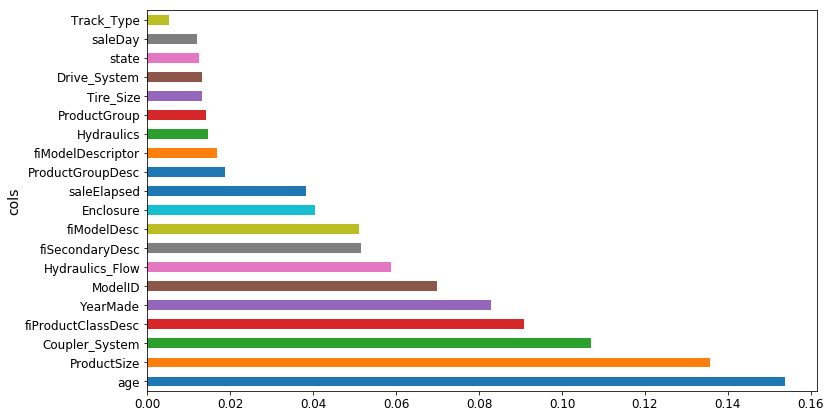

In [86]:
plot_fi(rf_feat_importance(m, X_train));

In [87]:
np.save('tmp/subs_cols.npy', np.array(df_subs.columns))

In [88]:
m = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 4min 19s, sys: 11.1 s, total: 4min 30s
Wall time: 1min 40s
[0.08013515031550839, 0.21185686730941936, 0.9865791217098764, 0.9198445482143607, 0.9143708800137945]
